/tmp/ipykernel_3373059/2464796870.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load('../Data/203_Diagnoses/DMPLB2/54545/OHV/Y.pt')


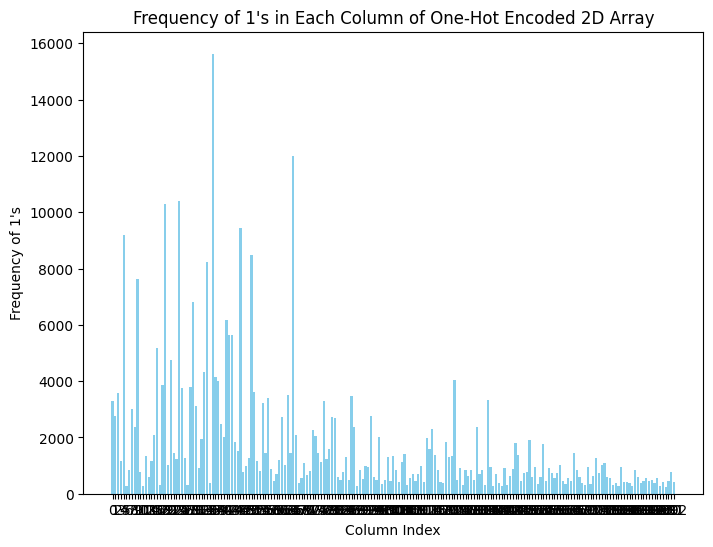

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load the tensor (make sure the path is correct)
Y = torch.load('../Data/203_Diagnoses/DMPLB2/54545/OHV/Y.pt')

# Step 1: Ensure the tensor is on CPU, then convert to a NumPy array
if isinstance(Y, torch.Tensor):
    Y = Y.cpu().numpy()  # Convert to NumPy array if it's a tensor

# Step 2: Sum each column to get the frequency of 1s in each column
column_frequencies = np.sum(Y, axis=0)

# Step 3: Plot the frequency of 1s in each column
plt.figure(figsize=(8, 6))
plt.bar(range(Y.shape[1]), column_frequencies, color='skyblue')
plt.xlabel("Column Index")
plt.ylabel("Frequency of 1's")
plt.title("Frequency of 1's in Each Column of One-Hot Encoded 2D Array")
plt.xticks(range(Y.shape[1]))

# Show the plot
plt.show()


In [9]:
row_sums = np.sum(Y, axis=1)
zero_sum_rows = row_sums == 0
count_zero_sum_rows = np.sum(zero_sum_rows)
print("Number of rows with zero sum:", count_zero_sum_rows)

Number of rows with zero sum: 60989


In [10]:
import networkx as nx

G = nx.read_gml('../Data/203_Diagnoses/complete_HG.gml')

In [11]:
class heterogeneous_Graph:
    def __init__(self, G):
        self.HG = G
        Nodes = list(self.HG.nodes())
        self.Patients =    [v for v in Nodes if v[0]=='C']
        self.Visits =      [v for v in Nodes if v[0]=='V']
        self.Medications = [v for v in Nodes if v[0]=='M']
        self.Diagnoses  =  [v for v in Nodes if v[0]=='D']
        self.Procedures =  [v for v in Nodes if v[0]=='P']
        self.Labs       =  [v for v in Nodes if v[0]=='L']
        self.MicroBio   =  [v for v in Nodes if v[0]=='B']
        self.Nodes = self.Patients  + self.Visits + self.Medications + self.Diagnoses + self.Procedures + self.Labs + self.MicroBio
        

Number of rows with zero sum: 26565


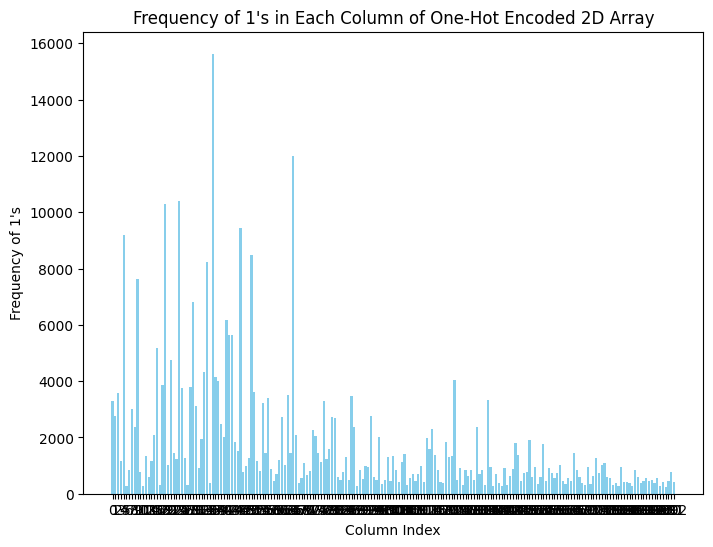

In [12]:
HG_obj = heterogeneous_Graph(G)
N = [i for i,v in enumerate(HG_obj.Nodes) if v[0]=='C']
YY = Y[N]

row_sums = np.sum(YY, axis=1)
zero_sum_rows = row_sums == 0
count_zero_sum_rows = np.sum(zero_sum_rows)
print("Number of rows with zero sum:", count_zero_sum_rows)

# Step 2: Sum each column to get the frequency of 1s in each column
column_frequencies = np.sum(Y, axis=0)

# Step 3: Plot the frequency of 1s in each column
plt.figure(figsize=(8, 6))
plt.bar(range(Y.shape[1]), column_frequencies, color='skyblue')
plt.xlabel("Column Index")
plt.ylabel("Frequency of 1's")
plt.title("Frequency of 1's in Each Column of One-Hot Encoded 2D Array")
plt.xticks(range(Y.shape[1]))

# Show the plot
plt.show()